In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
file = open("20250218.txt", "r")
lines = file.readlines()
file.close()

t = []
signal_a = []
signal_b = []

for line in lines:
    if line[0] == '' or line[0].isdigit() == False:
        continue

    line = line.strip()

    data = line.split('\t')
    t.append(float(data[0]))
    signal_a.append(float(data[1]))
    signal_b.append(float(data[2]))

smoothed_signal_b = []
for i in range(len(signal_b) - 10):
    if i % 10 == 0:
        smoothed_signal_b.append(np.mean(signal_b[i:i+10]))

t = t[::10]

print(len(t), len(smoothed_signal_b))


2208 2207


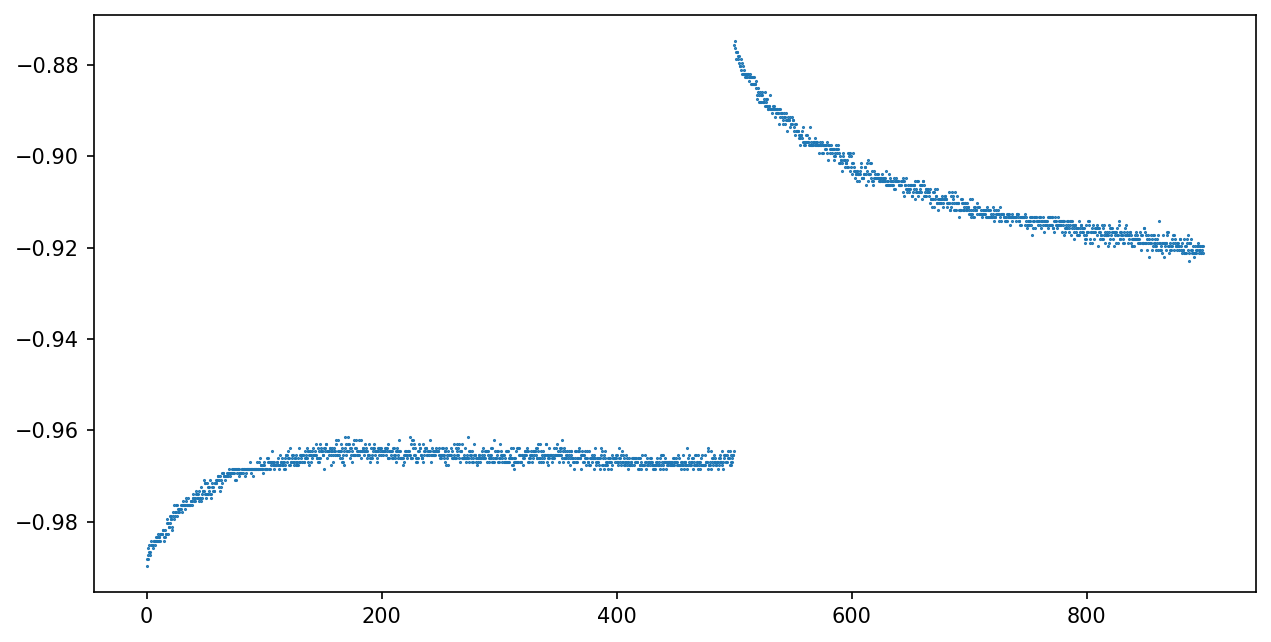

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=150)

ax.plot(t[:-1], smoothed_signal_b, label='Signal B', ls='', marker='.', markersize=1)

/var/folders/8n/5j1kdrfj4snbh52w9b_sq85c0000gn/T/ipykernel_17832/3745148550.py:10: RuntimeWarning: divide by zero encountered in divide
  return offset + A /  np.exp(-tau/t)
/Users/nielsaugustdavidsen/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


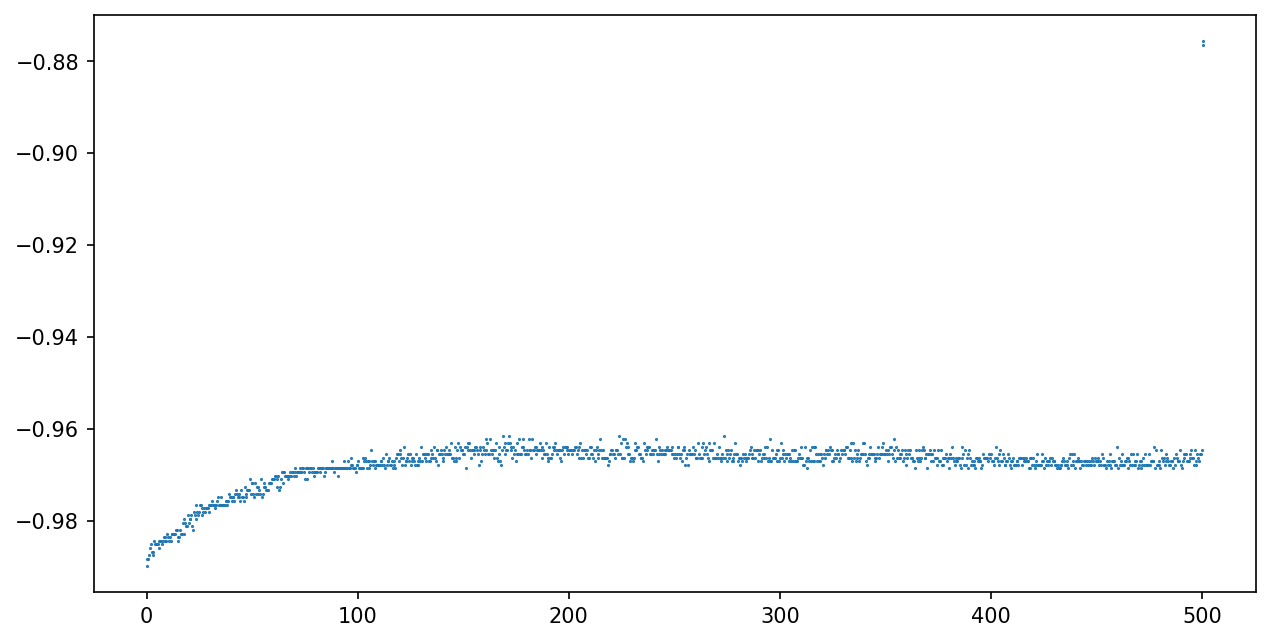

In [ ]:
signal_b = smoothed_signal_b.copy()
signal_b = np.array(signal_b)

first_half = signal_b[:np.argmax(signal_b)]
second_half = signal_b[np.argmax(signal_b):]
t_first_half = t[:np.argmax(signal_b)]
t_second_half = t[np.argmax(signal_b):]

def expon(t, A, tau, offset):
    return offset + A /  np.exp(t / tau)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(expon, t_first_half, first_half, p0=[1, 1e10, -1])

fig_fit, ax_fit = plt.subplots(1,1, figsize=(10,5), dpi=150)
ffh_lin = np.linspace(0, t_first_half[-1], 1000)
fsh_lin = np.linspace(0, t_second_half[-1], 1000)
ax_fit.plot(t_first_half, first_half, label='Signal B', ls='', marker='.', markersize=1)
ax_fit.plot(ffh_lin, expon(ffh_lin, *popt), label='Exponential Fit')


